## Module 5 Project: NBA Position Clustering
  
  Student name: Gabriel Blatstein  
  Student pace: Part Time  
  Scheduled project review date/time:  
  Instructor name: Brandon Lewis    
  Blog post URL: https://gabertooth.github.io/mod_5_project_nba_position_classification


__Project Background:__ The following Jupyter Notebook uses different classification machine learning modeling techniques to try and correctly identify a NBA players position based off of their physical traits and game stats. Due to the NBA shifting into a position-less basketball style of play, I thought it would be interesting to apply statistical python code to solve this problem. 

__Approach:__ The approach is simple, take data obtained from a kaggle open source data set that dates back to 1950 up until the 2017 NBA season. Using this data I will create four different types of models (KNN, SVM, RandomForest, Adaboost) and try to optimize each model using the modeling techniques learned in module 5. 

A __OSEMN framework__ was followed for this project:  

__Obtain:__ the data from the relevant resources and stakeholders  
__Scrub:__ Cleaning the data into formats that can be digested in Python packages such as Sklearn or Statsmodels Remember the "Garbage in, garbage out".  
__Explore:__ Using statistical methods and data analytic techniques explore the data to find significant patterns or trends  
__Model:__ Construct models to predict and forecast the data. Here we focus on our target variable which is price!  
__Interpret:__ Take the results of the analysis and model and create meaningful visualizations or presentations

__Project Background:__ The following Jupyter Notebook uses different classification machine learning modeling techniques to try and correctly identify a NBA players position based off of their physical traits and game stats. Due to the NBA shifting into a position-less basketball style of play, I thought it would be interesting to apply statistical python code to solve this problem. 

__Approach:__ The approach is simple, take data obtained from a kaggle open source data set that dates back to 1950 up until the 2017 NBA season. Using this data I will create four different types of models (KNN, SVM, RandomForest, Adaboost) and try to optimize each model using the modeling techniques learned in module 5. 

A __OSEMN framework__ was followed for this project:  

__Obtain:__ the data from the relevant resources and stakeholders  
__Scrub:__ Cleaning the data into formats that can be digested in Python packages such as Sklearn or Statsmodels Remember the "Garbage in, garbage out".  
__Explore:__ Using statistical methods and data analytic techniques explore the data to find significant patterns or trends  
__Model:__ Construct models to predict and forecast the data. Here we focus on our target variable which is price!  
__Interpret:__ Take the results of the analysis and model and create meaningful visualizations or presentations


This project was eye opening. It cemented many of the Machine Learning techniques learned throughout module 5. I truly believe I have both a technical and fundamental grasp on the following models, Random Forest, KNN, and SVM. I finally got to choose a topic for a project. Of course I chose the NBA. I am a very passionate Lebron James fan and will always say he is the GOAT. Anyway, I thought it would be perfect to classify NBA positions especially in the era of position-less basketball we see in todays game. I will now walk you through my analysis with code snippets that were necessary for the success of this project. 

The data set used can be found here, https://www.kaggle.com/drgilermo/nba-players-stats. It is a file with three different csv files. I used the player data and player stats csv's to run classification models on. The first step was to divide the data into different eras as not every year has the same stats. I decided to divide the data into the following:
 1. 1950-1956
 2. 1957-1979
 3. 1980-1998
 4. 1999-2017

From here I cleaned each of the data frames and ensured all of the data was digestible by the models I wanted to build. The four models I came up with were K-Nearest Neighbors, Adaboost, Random Forest, and Support Vector Machine. Below are the functions I built which were used for modeling each of the four data sets.

```

```




In [1]:
import pandas as pd #pandas for DataFrames etc.
import numpy as np #numpy for any type of array arithmatic etc.
import matplotlib.pyplot as plt #matplotlib for graphs etc.
import seaborn as sns #seaborn for heatmap graphs
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #sklearn modeling packages

from sklearn.cluster import KMeans #sklearn modeling packages
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#sklearn metric/pipeline/preprocessing/decomposition packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import operator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# raw_player= pd.read_csv(r'C:\Users\GBLS\Desktop\player_data.csv')
raw_player=pd.read_csv('/Users/gabrielblatstein/Downloads/nba-players-stats/player_data.csv')

In [3]:
raw_player.head() #Loading DataFrame of player Data (1/2 Datasets)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
player_df= raw_player[['name','height','weight']] #new data frame of just features we need

In [5]:
player_df.isna().sum() #checking for NaN

name      0
height    1
weight    6
dtype: int64

In [6]:
player_df= player_df.fillna(0) #Filled with 0's

In [7]:
player_df.isna().sum() #Check for NaN's being deleted

name      0
height    0
weight    0
dtype: int64

The player data was in a great and easy digestible format except for the height feature. For modeling and scaling purposes I needed to put the column into a friendly format of just inches. The code below transforms the data from a X-X format (Ex: 6-5 to a XX format (Ex: 75 inches).

In [8]:
player_df['Feet']= player_df['height'].str[0] #Creating a column for feet

In [9]:
player_df['Inches']= player_df['height'].str[2:] #Creating a column for inches

In [10]:
player_df=player_df.dropna() #Just in case drop any NaN's

In [11]:
player_df['Height_Inches']= (player_df['Feet'].astype('float64')*12) + (player_df['Inches'].astype('float64')) 
#formula to take the feet multiplied by the 12 inches then added to the inches column to come up with the total height in inches

In [12]:
player_df = player_df.drop(['Feet', 'height', 'Inches'], axis=1) #Dropping unused columns

In [13]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4549
Data columns (total 3 columns):
name             4549 non-null object
weight           4549 non-null float64
Height_Inches    4549 non-null float64
dtypes: float64(2), object(1)
memory usage: 142.2+ KB


In [14]:
player_df.head()

,name,weight,Height_Inches
0,Alaa Abdelnaby,240.0,82.0
1,Zaid Abdul-Aziz,235.0,81.0
2,Kareem Abdul-Jabbar,225.0,86.0
3,Mahmoud Abdul-Rauf,162.0,73.0
4,Tariq Abdul-Wahad,223.0,78.0


In [15]:
raw_df=pd.read_csv('/Users/gabrielblatstein/Downloads/nba-players-stats/Seasons_Stats.csv')
# raw_df= pd.read_csv(r'C:\Users\GBLS\Desktop\Seasons_Stats.csv') This was used for when I was working on a different computer
raw_df.head() #Loading player stats (2/2 of Dataset)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [17]:
raw_df.isna().sum() #General NaN look up

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [18]:
raw_df['blank2'].unique()

array([nan])

In [19]:
raw_df['blanl'].unique()

array([nan])

In [20]:
raw_df= raw_df.drop(['blanl', 'blank2', 'Unnamed: 0'], axis= 1) #Dropping unused or NaN columns

In [21]:
raw_df=pd.merge(raw_df,player_df,left_on='Player',right_on='name') #merging the two datasets together to create the master

In [23]:
raw_df= raw_df.drop('name', axis=1) #Dropping the name columns since we already have Player column

Due to the evolving style of play in the NBA, I decided to split up the dataset. I researched the NBA rule changes and things like when certain positions were introduced.  For example, guard use to be a position, but currently there is a shooting guard or a point guard. The same goes for Forward, as today we have Power Forward and Small Forward. 

A brief history is below:

1946-1956: There were two independent leagues the Basketball Association of America (BAA) and the National Basketball League (NBL). The NBL merged in 1949 with the BAA and the a new name was coined, the National Basketball Association (NBA). 

1956-1979: The Celtics dominated this time period with the likes of Bill Russel winning 8 straight championships. During the years of 1966 to 1968 the NBA expanded from 9 to 14 teams. Then slowly but surely teams were added throughout the years to reach a total of 22 teams in 1977.

1979-1998: The three point line was added from the ABA in 1979. This kicked off the rivalry of Larry Bird (Celtic) and Magic Johnson (Laker). For the next ten years these two players would battle for 8 titles in total. Jordan enters the league in 1984, and then four years later(1988) four more teams were added bringing the total to 27 teams. Jordan led the Bulls to two 3-peat championships during eight seasons. This led to the term of dynasties that started to form over the next two decades.

1998-2014: The Lakers and Spurs formed their Bulls version of a dynasty. The Spurs and Lakers combined to make 13 Finals in 16 seasons, with 10 titles amongst each other. The Lakers dynasty was led by the great Kobe Bryant and Shaquille O'Neal. On the other end, the Spurs dynasty was highlighted by Tim Duncan and David Robinson. Lebron James enters the league in 2003 as the number one pick. In 2007, Lebron James and the Cavaliers were swept by the Spurs in the NBA finals, with the Spurs once again asserting their dynasty dominance. 

At the start of the 2010-2011 season, the league was shocked by the Decision. Lebron James decided to take his talents to South Beach Miami to join Dwayne Wade and newly signed Chris Bosh. Lebron would go on to win two championships with the Miami Heat along with starting his record setting 8 NBA finals appearances. 

2014-Present: Just like the Celtics and Laker rivalry, a new rivalry formed. When Lebron decided in 2014 to go back to the city of Cleveland and bring a championship to Cleveland, a new rivalry was formed. The Cavaliers led by Lebron would face off with the Warriors led by Steph Curry and Klay Thompson in the 2014-2015, 2015-2016, 2017-2018. In the 2015-2016 Lebron James brought Cleveland's first NBA championship to the city to end their championship drought. Lebron then decided to take his talents to the Lakers at the start of the 2018 NBA season. 

The Warriors dynasty finally came to a end when Kevin Durant went down with two injuries in the 2019 finals against Kwahi Leonard and the Toronto Raptors. The Raptors took advantage of a injured Warriors squad and won the 2019 finals. Kevin Durant then decided to move teams to the Brooklyn Nets to join forces with Kyrie Irving. The NBA is now very shaken up and will be a very exciting spectacle entering the 2019 season. 



Divided the NBA into the eras highlighted above. 

In [24]:
NBA_1950_1956= raw_df[raw_df['Year']<1957]
NBA_1957_1979= raw_df[(raw_df['Year']>1956)&(raw_df['Year']<1980)]
NBA_1980_1998= raw_df[(raw_df['Year']>1979)&(raw_df['Year']<1999)]
NBA_1999_2017= raw_df[raw_df['Year']>1998]

Below are all of the functions I used in this Jupyter Notebook

In [25]:
def scale_df(df): #Simple function to easily be able to scale my data at any point
    scaler= StandardScaler()
    scaled_df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return scaled_df

In [26]:
def heatmap(df): #basic heatmap correlation matrix
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20)) #plot heat map
    g=sns.heatmap(round(df[top_corr_features].corr(),2),annot=True,cmap="RdYlGn")

In [27]:
def random_forest(df,X,y): #Random Forest model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    clf= RandomForestClassifier(random_state=0) #classifier defined
    clf.fit(X_train, y_train) #fitted data
    preds= clf.predict(X_test) #predictions of model using test data
    acc = round(accuracy_score(preds, y_test) * 100,2) #basic accuracy score
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Score']) #creating a list of top 10 features from RF model
    feat_importances = feat_importances.sort_values(by='Score',ascending=True) #sorting values
    feat_importances.plot(kind='barh') #plotting the features in a horizontal bar chart
    plt.show()
    pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix to show where the model predicted what positions
    
    Refined_X=feat_importances.index[-10:] #rerunning the model again this time using only the top 10 features
    X_key_features=df[Refined_X]
    y_key_features=df['Pos']

    X_train, X_test, y_train, y_test = train_test_split(X_key_features,y_key_features, test_size=.2)
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X_key_features.columns, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True)
    feat_importances.plot(kind='barh')
    plt.show()
    print(classification_report(y_test,preds))
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


In [28]:
def SVM(df,X,y): #Support Vector Machine Model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    svclassifier = SVC(kernel='linear') #defining classifier
    svclassifier.fit(X_train, y_train) #fitting SVM classifier
    y_pred = svclassifier.predict(X_test) #predicting y values using classifier and X_test
    pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix again
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification score with recall, precision, and F1 score

In [29]:
def KNN(X, y): #K Nearest Neighbor Model
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split

    clf= KNeighborsClassifier() #classifier defined
    clf.fit(X_train, y_train) #classifier fitted
    test_preds= clf.predict(X_test) #predicting y values using classifier and X_test
    acc = round(accuracy_score(test_preds, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,test_preds)) #classification score with recall, precision, and F1 score

    k_range =range(1,25) #Finding the optimal k
    scores= {} #accuracy scores dictionary
    scores_list= [] #scores list

    for k in k_range: #for loop to get each of the accuracy scores for different values of k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_preds=knn.predict(X_test)
        scores[k] = accuracy_score(y_test, test_preds)
        scores_list.append(accuracy_score(y_test, test_preds))

    plt.plot(k_range, scores_list)
    plt.xlabel('Value of K')
    plt.ylabel('Testing Accuracy')
    plt.show() #graph to show how the accuracy changes as K increases from 1 to 25

    max(scores.items(), key=operator.itemgetter(1))[0] , max(scores.items(), key=operator.itemgetter(1))[1] #max accuracy 

    optimal_k= max(scores.items(), key=operator.itemgetter(1))[0] #best k variable created

    clf= KNeighborsClassifier(n_neighbors=optimal_k) #rerunning the model with the optimal k value
    clf.fit(X_train, y_train)
    test_preds= clf.predict(X_test)
    acc = round(accuracy_score(test_preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,test_preds))
    return pd.crosstab(y_test, test_preds, rownames=['Actual Result'], colnames=['Predicted Result'])

In [30]:
def ADABOOST(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #train test split
    adaboost_clf = AdaBoostClassifier() #adaboost classifier 
    adaboost_clf.fit(X_train, y_train) #fit the model
    y_pred= adaboost_clf.predict(X_test)#predict the value of y using X_test
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification report
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix

In [31]:
def PCA_random_forest(X,y,n):
    
    pca= PCA(n_components=n) #setting the n for random forest, how many features we want

    pca_X=pca.fit_transform(X)#fit and transfrom the data
    
    X_train, X_test, y_train, y_test =train_test_split(pca_X,y, test_size=.2) #train test split

    clf= RandomForestClassifier(random_state=0) #run a RF classifier
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,preds)) #classification report
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix

In [32]:
def PCA_n(X,y): #function to do PCA
    pca_1= PCA(n_components= 7)
    pca_2= PCA(n_components= 10)
    pca_3= PCA(n_components= 15)

    principleComponents= pca_1.fit_transform(X)
    principleComponents= pca_2.fit_transform(X)
    principleComponents= pca_3.fit_transform(X)

    print(np.sum(pca_1.explained_variance_ratio_))
    print(np.sum(pca_2.explained_variance_ratio_))
    print(np.sum(pca_3.explained_variance_ratio_))

In [33]:
def PCA_SVM(X,y,n):
    
    X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=.2)

    scaler=StandardScaler()
    scaler.fit(X_train)

    X_train= scaler.transform(X_train)
    X_test= scaler.transform(X_test)

    pca= PCA(n_components=n)

    pca.fit(X)

    X_train= pca.transform(X_train)
    X_test= pca.transform(X_test)


    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    acc = round(accuracy_score(y_pred, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred))
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

## Modeling NBA Years

### Background on Different Algorithms Covered

Supervised classification machine learning can be broken down into two very basic categories, Binary classifiers and Multi-Class classifiers:

__1. Binary classifiers:__ Classification with only two distinct classes or the problem has only two outcomes  
   -Examples: Male/Female, author of a book, and basketball shot miss vs. made basket  
   
   
__2. Multi-Class classifiers:__ Classification with more than two distinct classes  
        Examples: sport positions, mood/feelings in music, and stock sectors   


There are a plethora of machine learning algorithms that can be used for basic classification problems. I will cover the 4 algorithms used in this notebook.  


__1. K-Nearest Neighbor:__ is a supervised learning algorithm that uses a distance metric to classify similar data together.   
 -Using the labels of the closest points, this determines what the model will label the unlabeled data point  
 -Selecting the value of K is very important and generally is a odd number due to tie breakers  
 -As K decreases, the predictions become less stable, and as K increases, the predictions become more stable   
 -Advantages: Simple and easy to implement, and no additional work is needed(aka no parameter tuning)    
 -Disadvantages: The algorithm gets very slow as you increase the number of examples, predictors, and or independent variables.      
 
 
__2. Random Forest:__ is an ensemble model that creates multiple trees and classifies objects based on the aggregated votes of all the trees.
 -Randomly selects a subset of features to use as predictors for each node of the decision trees  
 -Uses sub-sampling and bagging to creates a model resilient to overfitting  
 -Advantages: Strong performance due to the resilience to noise/variance, can handle missing data while maintaining accuracy, and friendly to large data set with high dimensionality.  
 -Disadvantages: User does not have control over what the model does, in this sense it is a black box  
 
   
__3. AdaBoost:__ each learner is trained on sub-sample of data and weights are assigned. As the learners correctly identify a data point the weight is reduced.   
 -Creates a new classifier by continually influencing the distribution of the data sampled to rain each successive learner  
 -Advantages: Less parameter tuning, feature selection, resilient to overfitting  
 -Disadvantages: Sensitive to noisy data and outliers, and better algos exist  
 
 
   
__4. Support Vector Machine (SVM):__ is a model that finds the hyperplane maximizing the distance between two or more classes. The goal is to maximize the margin between the decision boundary and the various data points.   
 -Advantages: Works well with unstructured and semi structured data, kernel ability to adjust to data, scalability  
 -Disadvantages: Choosing the right kernel can be tricky, long training times, difficult to comprehend the final model, variable weights, and individual impact.   



### NBA 1950-1956 

In [34]:
NBA_1950_1956.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1184
Data columns (total 52 columns):
Year             957 non-null float64
Player           957 non-null object
Pos              957 non-null object
Age              950 non-null float64
Tm               957 non-null object
G                957 non-null float64
GS               0 non-null float64
MP               514 non-null float64
PER              497 non-null float64
TS%              956 non-null float64
3PAr             0 non-null float64
FTr              956 non-null float64
ORB%             0 non-null float64
DRB%             0 non-null float64
TRB%             0 non-null float64
AST%             0 non-null float64
STL%             0 non-null float64
BLK%             0 non-null float64
TOV%             0 non-null float64
USG%             0 non-null float64
OWS              933 non-null float64
DWS              933 non-null float64
WS               933 non-null float64
WS/48            497 non-null float64
OBPM 

In [35]:
NBA_1950_1956.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,170.0,71.0
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0,170.0,71.0
2,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,185.0,74.0
3,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,0.322,...,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0,185.0,74.0
4,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,0.343,...,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0,185.0,74.0


In [36]:
NBA_1950_1956.isna().sum()

Year               0
Player             0
Pos                0
Age                7
Tm                 0
G                  0
GS               957
MP               443
PER              460
TS%                1
3PAr             957
FTr                1
ORB%             957
DRB%             957
TRB%             957
AST%             957
STL%             957
BLK%             957
TOV%             957
USG%             957
OWS               24
DWS               24
WS                24
WS/48            460
OBPM             957
DBPM             957
BPM              957
VORP             957
FG                 0
FGA                0
FG%                1
3P               957
3PA              957
3P%              957
2P                 0
2PA                0
2P%                1
eFG%               1
FT                 0
FTA                0
FT%               13
ORB              957
DRB              957
TRB              292
AST                0
STL              957
BLK              957
TOV          

In [37]:
NBA_1950_1956= NBA_1950_1956.drop(['TOV','STL','BLK','TRB','DRB','ORB','GS','3PAr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OBPM','DBPM','BPM','VORP','3P','3PA','3P%'],axis=1)
#Dropping unnecesary columns     

In [38]:
NBA_1950_1956.isna().sum()

Year               0
Player             0
Pos                0
Age                7
Tm                 0
G                  0
MP               443
PER              460
TS%                1
FTr                1
OWS               24
DWS               24
WS                24
WS/48            460
FG                 0
FGA                0
FG%                1
2P                 0
2PA                0
2P%                1
eFG%               1
FT                 0
FTA                0
FT%               13
AST                0
PF                 0
PTS                0
weight             0
Height_Inches      0
dtype: int64

The missing values or NaN can be attributed to a few things, either a player never attempted or had said stat or the stat did not exist back in the day. We will fill in 0 for stats like FT% where a player just never took a free throw. I do not want to get rid of half the data due to a Nan 

In [39]:
NBA_1950_1956= NBA_1950_1956.fillna(0)
NBA_1950_1956.isna().sum() #Filling NaN values with a 0

Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              0
FTr              0
OWS              0
DWS              0
WS               0
WS/48            0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
AST              0
PF               0
PTS              0
weight           0
Height_Inches    0
dtype: int64

In [40]:
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='PG', 'Pos'] = 1 #one hot encoding the string Position column into numbers
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='G-F', 'Pos']= 3 
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='SF', 'Pos']= 3 
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='SG', 'Pos']= 2
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='G', 'Pos']= 2
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='F', 'Pos']= 3
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='F-C', 'Pos']= 4
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='F-G', 'Pos']= 3
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='PF', 'Pos']= 4
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='C', 'Pos']= 5
NBA_1950_1956.loc[NBA_1950_1956['Pos']=='C-F', 'Pos']= 5
#Multicollinearity Heatmap Matrix

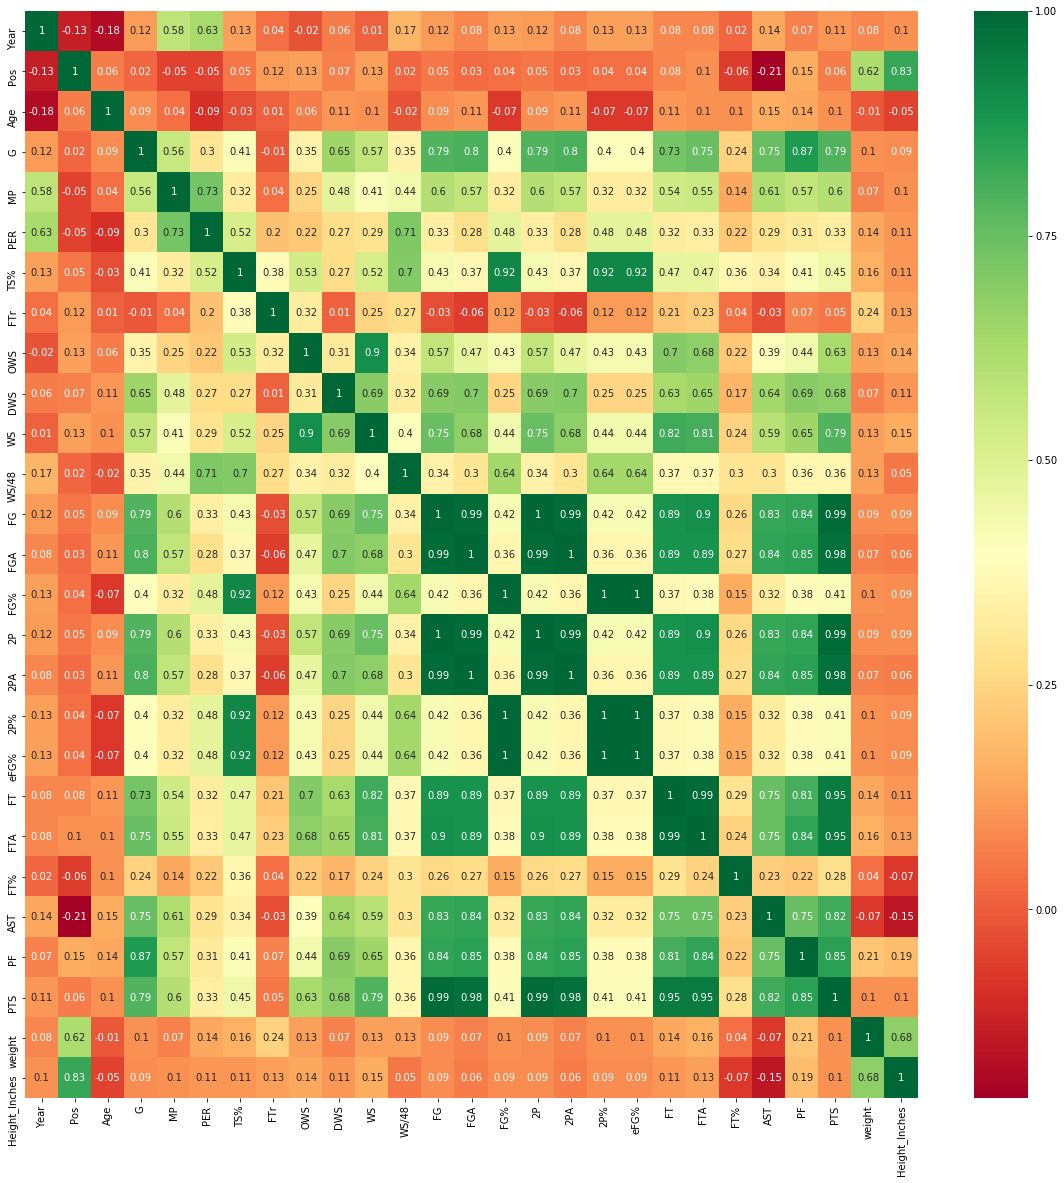

In [41]:
heatmap(NBA_1950_1956) #Multicollinearity Heatmap Matrix

We can see that alot of the features are correlated with each other. This would make sense as a lot of the statistics are built from other statistics. Therefore there will be high correlation between say free throws (FT) and free throws attempted (FTA).  

I decided to drop some of the highly correlated features to try and improve the models that follow.

In [42]:
X=NBA_1950_1956.drop(['Pos','Year','Tm','Player','FTA','FT','FGA','FG','WS/48','2PA','2P','FG','FGA','PTS'], axis=1)
y=NBA_1950_1956['Pos']
#Dividing out data into the target (y) and the features (X)

In [43]:
X= scale_df(X) #Scaled the features in order to run models

#### KNN (1950-1956

Accuracy is :58.33%
              precision    recall  f1-score   support

           1       0.39      0.44      0.41        16
           2       0.60      0.63      0.62        51
           3       0.54      0.66      0.59        58
           4       0.53      0.49      0.51        35
           5       1.00      0.56      0.72        32

   micro avg       0.58      0.58      0.58       192
   macro avg       0.61      0.55      0.57       192
weighted avg       0.62      0.58      0.59       192



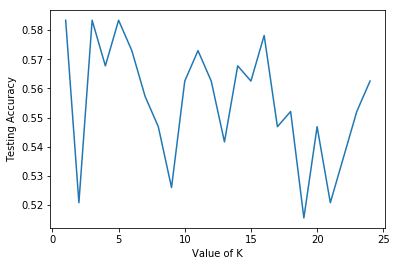

Accuracy is :58.33%
              precision    recall  f1-score   support

           1       0.50      0.50      0.50        16
           2       0.63      0.67      0.65        51
           3       0.55      0.62      0.58        58
           4       0.48      0.46      0.47        35
           5       0.78      0.56      0.65        32

   micro avg       0.58      0.58      0.58       192
   macro avg       0.59      0.56      0.57       192
weighted avg       0.59      0.58      0.58       192



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,8,8,0,0,0
2,7,34,9,1,0
3,1,9,36,11,1
4,0,1,14,16,4
5,0,2,7,5,18


In [44]:
KNN(X,y)

The KNN model is said to be a lazy model. The accuracy score of 57% would make logical sense. In addition, as we can see there is still quite a bit of misclassification. I believe not having as many features may be the cause of that. This era of basketball did not have many statistics nor a 3-point shot.  

#### AdaBoost (1950-1956)

In [52]:
ADABOOST(X,y)

Accuracy is :55.21%
              precision    recall  f1-score   support

           1       0.28      0.53      0.36        15
           2       0.52      0.58      0.55        55
           3       0.60      0.48      0.53        63
           4       0.76      0.41      0.53        32
           5       0.66      0.85      0.74        27

   micro avg       0.55      0.55      0.55       192
   macro avg       0.56      0.57      0.54       192
weighted avg       0.59      0.55      0.55       192



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,8,7,0,0,0
2,16,32,7,0,0
3,5,21,30,1,6
4,0,1,12,13,6
5,0,0,1,3,23


The Adaboost classifier did just as poorly as the KNN neighbor. I found throughout my analysis that Adaboost was not a very good model for this classification problem. As we can see the PG (1) is being misclassified quite a bit. However, occasionally I have run into a Adaboost model where it accurately predicts a position close to 100%.

#### Random Forest (1950-1956)

Accuracy is :65.62%


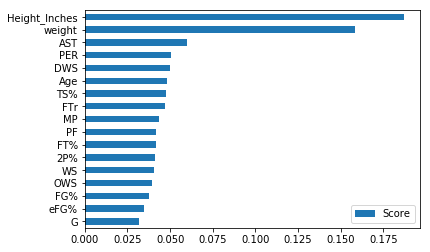

Accuracy is :72.4%


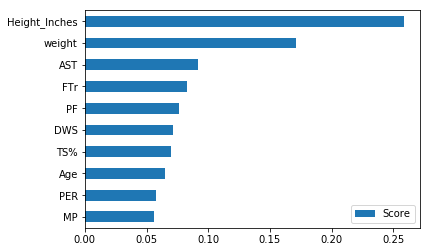

              precision    recall  f1-score   support

           1       0.50      0.67      0.57        15
           2       0.75      0.55      0.63        44
           3       0.73      0.86      0.79        63
           4       0.68      0.66      0.67        38
           5       0.90      0.81      0.85        32

   micro avg       0.72      0.72      0.72       192
   macro avg       0.71      0.71      0.70       192
weighted avg       0.73      0.72      0.72       192



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,10,5,0,0,0
2,10,24,9,1,0
3,0,3,54,5,1
4,0,0,11,25,2
5,0,0,0,6,26


In [53]:
random_forest(NBA_1950_1956,X,y)

The Random Forest basic model performed at 65% accuracy. Then once feature selection was included we saw a jump in accuracy and other scores to 72%. Using the top ten features was a great way to increase the model predictions. To try and increase our metrics even more, I would like to introduce PCA.

In [57]:
PCA_random_forest(X,y,7)

Accuracy is :58.85%
              precision    recall  f1-score   support

           1       0.73      0.36      0.48        22
           2       0.61      0.66      0.63        50
           3       0.56      0.67      0.61        66
           4       0.48      0.40      0.44        30
           5       0.67      0.67      0.67        24

   micro avg       0.59      0.59      0.59       192
   macro avg       0.61      0.55      0.57       192
weighted avg       0.59      0.59      0.58       192



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,8,12,2,0,0
2,2,33,15,0,0
3,1,9,44,7,5
4,0,0,15,12,3
5,0,0,2,6,16


Unfortunately, PCA has lowered our accuracy. This is very interesting and can be attributed to making our sample space smaller. As our sample space is already on the smaller end of the spectrum. I believe PCA may not be needed for my project. We will see how it fairs in the coming eras. 

#### SVM (1950-1956)

In [62]:
SVM(NBA_1950_1956,X,y)

Accuracy is :67.19%
              precision    recall  f1-score   support

           1       0.70      0.35      0.47        20
           2       0.53      0.73      0.62        44
           3       0.72      0.61      0.66        67
           4       0.66      0.78      0.71        32
           5       0.89      0.83      0.86        29

   micro avg       0.67      0.67      0.67       192
   macro avg       0.70      0.66      0.66       192
weighted avg       0.69      0.67      0.67       192



Here we see the comparable stats to the Random Forest models. A basic Support Vector Machine model seems to perform either better or very close to a basic Random Forest algorithm with no feature selection. In addition, some of the classification report metrics are fairly high for individual classes. For example the center position has the highest precision, recall, and f1-score averaging out at about 85%.  

In [64]:
PCA_SVM(X,y,7)

Accuracy is :64.58%
              precision    recall  f1-score   support

           1       0.50      0.32      0.39        19
           2       0.60      0.71      0.65        55
           3       0.68      0.64      0.66        67
           4       0.55      0.57      0.56        28
           5       0.87      0.87      0.87        23

   micro avg       0.65      0.65      0.65       192
   macro avg       0.64      0.62      0.63       192
weighted avg       0.64      0.65      0.64       192



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,6,12,1,0,0
2,6,39,10,0,0
3,0,14,43,10,0
4,0,0,9,16,3
5,0,0,0,3,20


Once again, we see that PCA did not increase our accuracy at all. This is very frustrating, but confirms my hunch of not needing it at least for this era. We will continue to test the affect of PCA on the rest of the models. 

Small note before moving onto the next era. I predict that as we go further along in our analysis we will see our base models increase in accuracy and classification report metrics as more metrics will enable the models to gain more insight into our data. 

### NBA 1957-1979

In [65]:
NBA_1957_1979.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
52,1957.0,Carl Braun,PG,29.0,NYK,72.0,NaN,2345.0,13.8,0.444,...,NaN,259.0,256.0,NaN,NaN,NaN,195.0,1001.0,180.0,77.0
53,1958.0,Carl Braun,PG,30.0,NYK,71.0,NaN,2475.0,17.5,0.495,...,NaN,330.0,393.0,NaN,NaN,NaN,183.0,1173.0,180.0,77.0
54,1959.0,Carl Braun,PG,31.0,NYK,72.0,NaN,1959.0,15.2,0.483,...,NaN,251.0,349.0,NaN,NaN,NaN,178.0,754.0,180.0,77.0
55,1960.0,Carl Braun,PG,32.0,NYK,54.0,NaN,1514.0,15.0,0.481,...,NaN,168.0,270.0,NaN,NaN,NaN,127.0,699.0,180.0,77.0
56,1961.0,Carl Braun,PG,33.0,NYK,15.0,NaN,218.0,14.8,0.499,...,NaN,31.0,48.0,NaN,NaN,NaN,29.0,85.0,180.0,77.0


In [66]:
NBA_1957_1979.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3872 entries, 52 to 6256
Data columns (total 52 columns):
Year             3872 non-null float64
Player           3872 non-null object
Pos              3872 non-null object
Age              3871 non-null float64
Tm               3872 non-null object
G                3872 non-null float64
GS               0 non-null float64
MP               3872 non-null float64
PER              3862 non-null float64
TS%              3863 non-null float64
3PAr             0 non-null float64
FTr              3861 non-null float64
ORB%             1695 non-null float64
DRB%             1695 non-null float64
TRB%             2374 non-null float64
AST%             3159 non-null float64
STL%             1695 non-null float64
BLK%             1695 non-null float64
TOV%             657 non-null float64
USG%             659 non-null float64
OWS              3862 non-null float64
DWS              3862 non-null float64
WS               3862 non-null float64
WS/48 

In [67]:
NBA_1957_1979.isna().sum()

Year                0
Player              0
Pos                 0
Age                 1
Tm                  0
G                   0
GS               3872
MP                  0
PER                10
TS%                 9
3PAr             3872
FTr                11
ORB%             2177
DRB%             2177
TRB%             1498
AST%              713
STL%             2177
BLK%             2177
TOV%             3215
USG%             3213
OWS                10
DWS                10
WS                 10
WS/48              10
OBPM             2177
DBPM             2177
BPM              2177
VORP             2177
FG                  0
FGA                 0
FG%                11
3P               3872
3PA              3872
3P%              3872
2P                  0
2PA                 0
2P%                11
eFG%               11
FT                  0
FTA                 0
FT%               101
ORB              2177
DRB              2177
TRB                 0
AST                 0
STL       

In [68]:
NBA_1957_1979=NBA_1957_1979.drop(['3P','3PA','3P%','3PAr','GS','ORB%','DRB%','TOV','BLK','STL','DRB','ORB','VORP','BPM','DBPM','OBPM','TRB','STL%','BLK%','TOV%','USG%'], axis=1)
#Dropping unnecessary columns

In [69]:
NBA_1957_1979.isna().sum()

Year                0
Player              0
Pos                 0
Age                 1
Tm                  0
G                   0
MP                  0
PER                10
TS%                 9
FTr                11
TRB%             1498
AST%              713
OWS                10
DWS                10
WS                 10
WS/48              10
FG                  0
FGA                 0
FG%                11
2P                  0
2PA                 0
2P%                11
eFG%               11
FT                  0
FTA                 0
FT%               101
AST                 0
PF                  0
PTS                 0
weight              0
Height_Inches       0
dtype: int64

In [70]:
NBA_1957_1979=NBA_1957_1979.fillna(0)#Filling NaN values with a 0

In [71]:
NBA_1957_1979.isna().sum()

Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              0
FTr              0
TRB%             0
AST%             0
OWS              0
DWS              0
WS               0
WS/48            0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
AST              0
PF               0
PTS              0
weight           0
Height_Inches    0
dtype: int64

In [72]:
NBA_1957_1979.Pos.unique()

array(['PG', 'PF', 'F-C', 'G', 'SG', 'C', 'G-F', 'C-F', 'SF', 'F-G', 'F',
       'PF-C', 'C-PF', 'PF-SF', 'SF-PF', 'SF-SG', 'SF-PG', 'C-SF',
       'SG-PG'], dtype=object)

In [73]:
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='PG', 'Pos'] = 1 #one hot encoding the string Position column into numbers
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SG', 'Pos']= 2
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SG-PG', 'Pos']= 2
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='G', 'Pos']= 2
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='G-F', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SF', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='F', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SF-PF', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SF-SG', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='SF-PG', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='F-G', 'Pos']= 3
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='F-C', 'Pos']= 4
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='PF', 'Pos']= 4
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='PF-SF', 'Pos']= 4
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='PF-C', 'Pos']= 4
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='C', 'Pos']= 5
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='C-PF', 'Pos']= 5
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='C-F', 'Pos']= 5
NBA_1957_1979.loc[NBA_1957_1979['Pos']=='C-SF', 'Pos']= 5

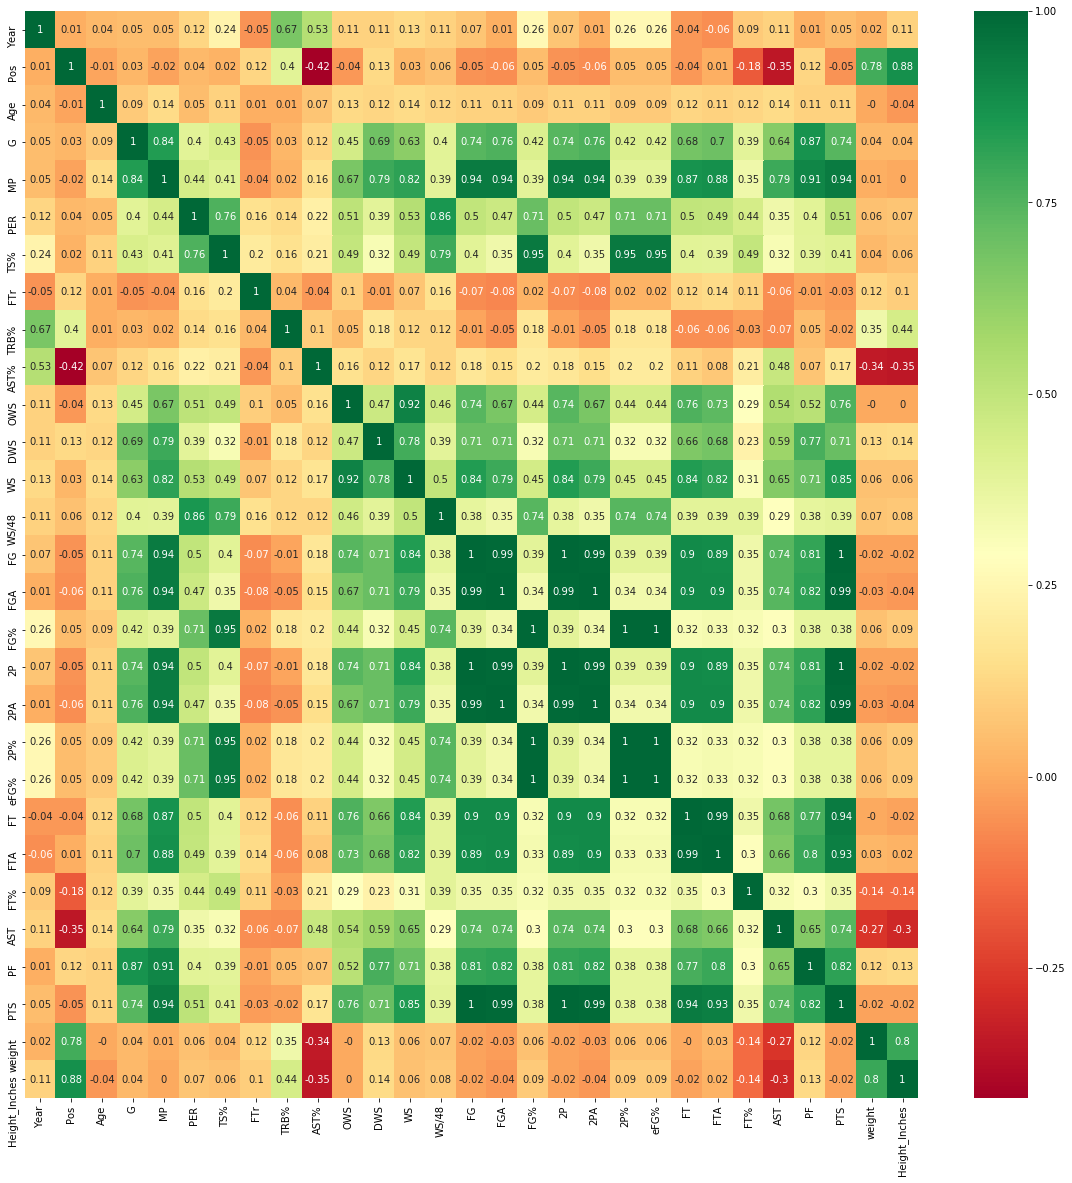

In [74]:
heatmap(NBA_1957_1979)#Multicollinearity Heatmap Matrix 

Once again, we can see the multicollinearity amongst our features. 
I decided to drop some of the highly correlated features to try and improve the models that follow.

In [75]:
X= NBA_1957_1979.drop(['Pos','Year','Tm','Player','FTA','FT','FGA','FG','WS/48','2PA','2P','FG','FGA','PTS'], axis=1)
y= NBA_1957_1979['Pos']

In [76]:
X= scale_df(X)

#### KNN (1957-1979)

Accuracy is :65.29%
              precision    recall  f1-score   support

           1       0.71      0.62      0.66       122
           2       0.65      0.68      0.66       171
           3       0.61      0.69      0.65       182
           4       0.56      0.69      0.62       146
           5       0.84      0.56      0.67       154

   micro avg       0.65      0.65      0.65       775
   macro avg       0.68      0.65      0.65       775
weighted avg       0.67      0.65      0.65       775



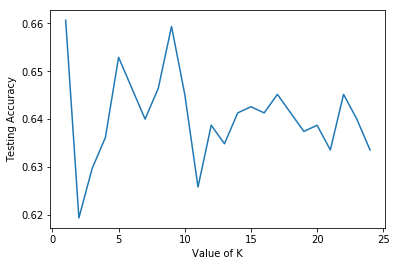

Accuracy is :66.06%
              precision    recall  f1-score   support

           1       0.69      0.70      0.70       122
           2       0.67      0.65      0.66       171
           3       0.65      0.64      0.64       182
           4       0.55      0.66      0.60       146
           5       0.80      0.66      0.72       154

   micro avg       0.66      0.66      0.66       775
   macro avg       0.67      0.66      0.66       775
weighted avg       0.67      0.66      0.66       775



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,86,34,2,0,0
2,36,112,22,1,0
3,3,19,116,36,8
4,0,3,28,97,18
5,0,0,10,43,101


In [77]:
KNN(X,y)

The KNN model decreased from the prior era. In addition, as we can see there is still quite a bit of misclassification. Still we do not nearly have as many features as the more modern eras of basketball

#### Adaboost (1957-1979)

In [78]:
ADABOOST(X,y)

Accuracy is :60.0%
              precision    recall  f1-score   support

           1       0.55      0.66      0.60       117
           2       0.59      0.56      0.57       167
           3       0.74      0.58      0.65       184
           4       0.49      0.41      0.45       154
           5       0.61      0.82      0.70       153

   micro avg       0.60      0.60      0.60       775
   macro avg       0.60      0.60      0.59       775
weighted avg       0.60      0.60      0.60       775



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,77,39,1,0,0
2,58,94,14,1,0
3,3,26,106,39,10
4,1,1,20,63,69
5,1,0,2,25,125


Adaboost once again proves to be the weakest model out of the four models fitted. However, it does classify the 1 and 5 almost perfectly depending on the instance of the model ran. 

#### Random Forest (1957-1979)

Accuracy is :72.0%


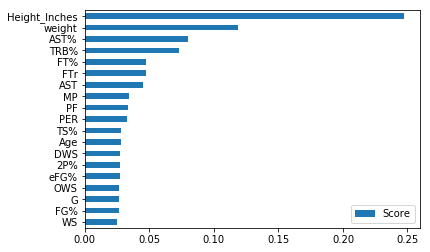

Accuracy is :76.39%


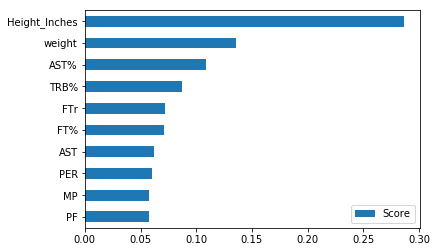

              precision    recall  f1-score   support

           1       0.76      0.78      0.77       126
           2       0.76      0.72      0.74       185
           3       0.71      0.77      0.74       185
           4       0.71      0.73      0.72       141
           5       0.93      0.83      0.87       138

   micro avg       0.76      0.76      0.76       775
   macro avg       0.77      0.77      0.77       775
weighted avg       0.77      0.76      0.77       775



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,98,27,1,0,0
2,30,134,21,0,0
3,1,16,143,24,1
4,0,0,30,103,8
5,0,0,5,19,114


In [79]:
random_forest(NBA_1957_1979,X,y)

The Random Forest basic model performed very well improving the prior era by around 8-10% accuracy. Feature selection really helped this model improve! Using the top ten features was a great way to increase the model predictions. We also see the center position have a precision of 93% which is fantastic. 

Despite PCA not working for our prior era modeling, I will try once again to introduce PCA

In [80]:
PCA_n(X,y)

0.8752737378888106
0.9548663071206103
0.9986470801607076


In [81]:
PCA_random_forest(X,y,7)

Accuracy is :60.39%
              precision    recall  f1-score   support

           1       0.62      0.69      0.66       114
           2       0.63      0.59      0.61       185
           3       0.57      0.56      0.56       189
           4       0.48      0.53      0.50       145
           5       0.75      0.68      0.72       142

   micro avg       0.60      0.60      0.60       775
   macro avg       0.61      0.61      0.61       775
weighted avg       0.61      0.60      0.61       775



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,79,34,1,0,0
2,46,109,29,1,0
3,2,24,106,47,10
4,0,4,42,77,22
5,0,1,9,35,97


Unfortunately, PCA once again lowered our accuracy. This is very interesting and can be attributed to making our sample space smaller. As our sample space is already on the smaller end of the spectrum. This is starting to confirm PCA is not needed for these basic models. 

#### SVM (1957-1979)

In [83]:
SVM(NBA_1957_1979,X,y)

Accuracy is :70.45%
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       108
           2       0.70      0.73      0.71       171
           3       0.70      0.66      0.68       191
           4       0.59      0.66      0.62       160
           5       0.85      0.79      0.82       145

   micro avg       0.70      0.70      0.70       775
   macro avg       0.71      0.71      0.71       775
weighted avg       0.71      0.70      0.71       775



In [84]:
PCA_SVM(X,y,7)

Accuracy is :65.29%
              precision    recall  f1-score   support

           1       0.74      0.63      0.68       128
           2       0.66      0.73      0.69       181
           3       0.66      0.62      0.64       178
           4       0.52      0.55      0.54       152
           5       0.72      0.71      0.72       136

   micro avg       0.65      0.65      0.65       775
   macro avg       0.66      0.65      0.65       775
weighted avg       0.66      0.65      0.65       775



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,81,46,1,0,0
2,28,133,19,1,0
3,0,23,111,40,4
4,0,1,34,84,33
5,0,0,3,36,97


The SVM models performed fairly well in relation to the other models. It is just slightly behind the Random Forest model by a few percentage points. The two models that seem to be the most accurate are SVM and Random Forest.

### NBA 1980-1998

In [85]:
NBA_1980_1998.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
1258,1980.0,Jim Paxson,SG,22.0,POR,72.0,NaN,1270.0,9.1,0.443,...,84.0,109.0,144.0,48.0,5.0,93.0,97.0,443.0,200.0,78.0
1259,1980.0,Jim Paxson,SG,22.0,POR,72.0,NaN,1270.0,9.1,0.443,...,84.0,109.0,144.0,48.0,5.0,93.0,97.0,443.0,200.0,78.0
1260,1981.0,Jim Paxson,SG,23.0,POR,79.0,NaN,2701.0,16.9,0.564,...,137.0,211.0,299.0,140.0,9.0,131.0,172.0,1354.0,200.0,78.0
1261,1981.0,Jim Paxson,SG,23.0,POR,79.0,NaN,2701.0,16.9,0.564,...,137.0,211.0,299.0,140.0,9.0,131.0,172.0,1354.0,200.0,78.0
1262,1982.0,Jim Paxson,SG,24.0,POR,82.0,82.0,2756.0,18.0,0.561,...,146.0,221.0,276.0,129.0,12.0,144.0,159.0,1552.0,200.0,78.0


In [86]:
NBA_1980_1998.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 1258 to 15407
Data columns (total 52 columns):
Year             7939 non-null float64
Player           7939 non-null object
Pos              7939 non-null object
Age              7939 non-null float64
Tm               7939 non-null object
G                7939 non-null float64
GS               7286 non-null float64
MP               7939 non-null float64
PER              7939 non-null float64
TS%              7916 non-null float64
3PAr             7908 non-null float64
FTr              7908 non-null float64
ORB%             7939 non-null float64
DRB%             7939 non-null float64
TRB%             7939 non-null float64
AST%             7939 non-null float64
STL%             7939 non-null float64
BLK%             7939 non-null float64
TOV%             7921 non-null float64
USG%             7939 non-null float64
OWS              7939 non-null float64
DWS              7939 non-null float64
WS               7939 non-null flo

In [87]:
NBA_1980_1998.isna().sum()

Year                0
Player              0
Pos                 0
Age                 0
Tm                  0
G                   0
GS                653
MP                  0
PER                 0
TS%                23
3PAr               31
FTr                31
ORB%                0
DRB%                0
TRB%                0
AST%                0
STL%                0
BLK%                0
TOV%               18
USG%                0
OWS                 0
DWS                 0
WS                  0
WS/48               0
OBPM                0
DBPM                0
BPM                 0
VORP                0
FG                  0
FGA                 0
FG%                31
3P                  0
3PA                 0
3P%              1630
2P                  0
2PA                 0
2P%                39
eFG%               31
FT                  0
FTA                 0
FT%               274
ORB                 0
DRB                 0
TRB                 0
AST                 0
STL       

In [88]:
NBA_1980_1998=NBA_1980_1998.fillna(0)#Filling NaN values with a 0 

In [89]:
NBA_1980_1998.Pos.unique()

array(['SG', 'PG', 'PF', 'SF', 'SF-SG', 'C', 'SG-PG', 'SG-SF', 'PF-C',
       'C-PF', 'PG-SG', 'SF-PF', 'PF-SF'], dtype=object)

In [90]:
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='PG', 'Pos'] = 1 #one hot encoding the string Position column into numbers
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='PG-SG', 'Pos'] = 1 
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SG', 'Pos']= 2
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SG-SF', 'Pos']= 2
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SG-PG', 'Pos']= 2
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SF-SG', 'Pos']= 3
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SF-PF', 'Pos']= 3
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='SF', 'Pos']= 3
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='PF', 'Pos']= 4
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='PF-C', 'Pos']= 4
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='PF-SF', 'Pos']= 4
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='C', 'Pos']= 5
NBA_1980_1998.loc[NBA_1980_1998['Pos']=='C-PF', 'Pos']= 5

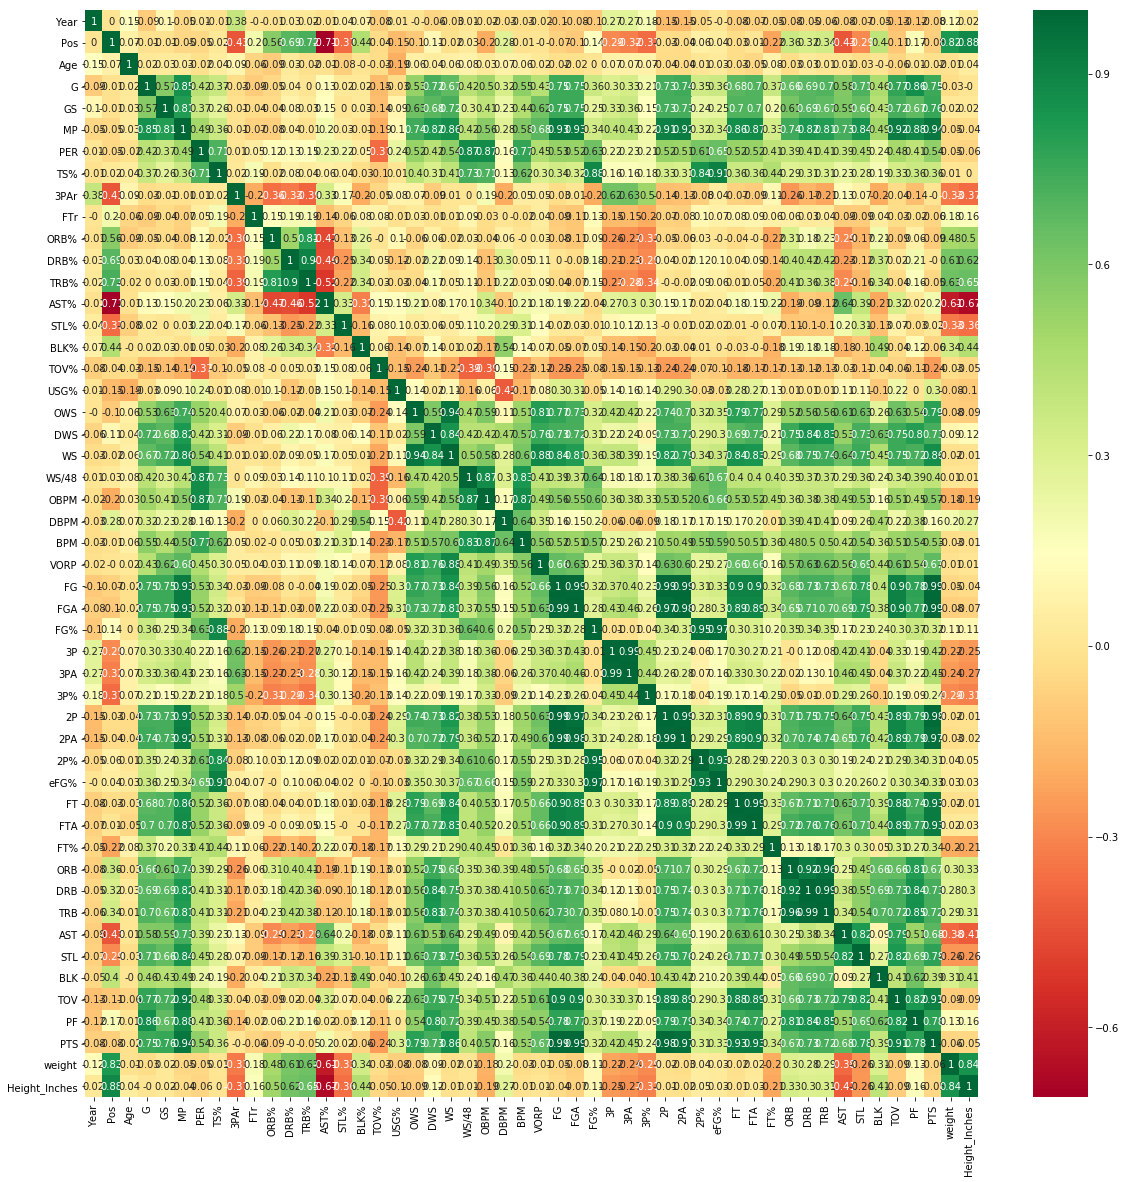

In [91]:
heatmap(NBA_1980_1998) #Multicollinearity Heatmap Matrix

The graph is very messy, but it still gives us the first full picture into all the different stats of the modern era. There are roughly 52 features compared to the prior 29 features. This should increase our accuracy because of all the additional data features. This is the first era of basketball that has any 3 point data along with some other defensive and offensive metrics. 

In [92]:
X= NBA_1980_1998.drop(['Pos','Year','Tm','Player','FTA','FT','FGA','FG','WS/48','2PA','2P','FG','FGA','PTS','3PA','3P','PTS'], axis=1)
y= NBA_1980_1998['Pos']

In [93]:
X=scale_df(X)

#### KNN (1980-1998)

Accuracy is :70.15%
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       318
           2       0.65      0.66      0.66       329
           3       0.62      0.65      0.63       303
           4       0.68      0.68      0.68       371
           5       0.78      0.65      0.71       267

   micro avg       0.70      0.70      0.70      1588
   macro avg       0.71      0.70      0.70      1588
weighted avg       0.70      0.70      0.70      1588



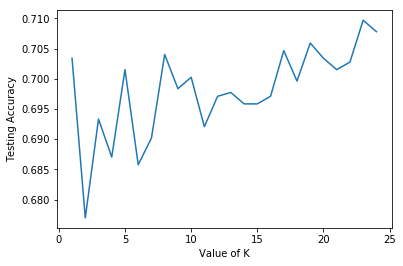

Accuracy is :70.97%
              precision    recall  f1-score   support

           1       0.82      0.89      0.85       318
           2       0.68      0.67      0.67       329
           3       0.64      0.62      0.63       303
           4       0.67      0.69      0.68       371
           5       0.74      0.69      0.71       267

   micro avg       0.71      0.71      0.71      1588
   macro avg       0.71      0.71      0.71      1588
weighted avg       0.71      0.71      0.71      1588



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,282,32,3,1,0
2,57,219,48,4,1
3,5,64,188,42,4
4,0,5,52,255,59
5,0,1,3,80,183


In [94]:
KNN(X,y)

As expected with the addition of all these new features we get a model that is performing at around 70% which is awesome! In addition we have some positions predicting at a very high rate. The PG position seems to be performing the best in this specific time period and model. 

#### Adaboost (1980-1998)

In [102]:
ADABOOST(X,y)

Accuracy is :66.37%
              precision    recall  f1-score   support

           1       0.71      0.96      0.82       319
           2       0.65      0.50      0.56       309
           3       0.70      0.48      0.57       304
           4       0.65      0.47      0.55       350
           5       0.62      0.92      0.74       306

   micro avg       0.66      0.66      0.66      1588
   macro avg       0.67      0.67      0.65      1588
weighted avg       0.67      0.66      0.65      1588



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,307,12,0,0,0
2,116,154,35,4,0
3,7,68,145,65,19
4,0,4,24,165,157
5,0,0,2,21,283


Even Adaboost which was performing the poorest on the data went up significantly compared to the prior eras. 

#### Random Forest (1980-1998)

Accuracy is :77.27%


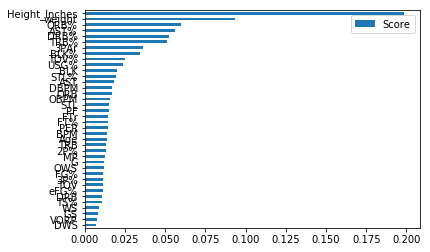

Accuracy is :78.84%


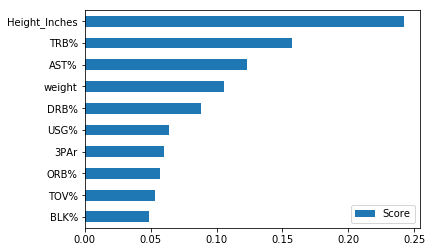

              precision    recall  f1-score   support

           1       0.86      0.89      0.88       318
           2       0.74      0.77      0.76       302
           3       0.76      0.76      0.76       316
           4       0.73      0.75      0.74       341
           5       0.87      0.77      0.82       311

   micro avg       0.79      0.79      0.79      1588
   macro avg       0.79      0.79      0.79      1588
weighted avg       0.79      0.79      0.79      1588



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,284,31,2,0,1
2,45,233,23,1,0
3,0,48,240,26,2
4,0,2,50,255,34
5,0,1,1,69,240


In [103]:
random_forest(NBA_1980_1998,X,y)

As expected, Random Forest beat out both KNN and Adaboost. In addition, the score increased around 7-8 percent from using the feature selection. Next, try PCA as it might be needed here with the extra features. 

In [104]:
PCA_n(X,y)

0.7600620269199043
0.83718927078447
0.9207216215796546


In [105]:
PCA_random_forest(X,y,10)

Accuracy is :67.44%
              precision    recall  f1-score   support

           1       0.80      0.85      0.83       319
           2       0.62      0.66      0.64       314
           3       0.62      0.58      0.60       318
           4       0.61      0.63      0.62       352
           5       0.72      0.65      0.68       285

   micro avg       0.67      0.67      0.67      1588
   macro avg       0.68      0.67      0.67      1588
weighted avg       0.67      0.67      0.67      1588



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,272,47,0,0,0
2,58,207,47,2,0
3,8,72,184,47,7
4,1,6,57,223,65
5,0,0,9,91,185


Accuracy only went down a little bit, but we still didnt see even improvement in any of the F1, precision, or recall scores. This is starting to cement the lack of need for PCA for this dataset.

#### SVM (1980-1998)

In [107]:
SVM(NBA_1980_1998,X,y)

Accuracy is :76.76%
              precision    recall  f1-score   support

           1       0.87      0.86      0.87       324
           2       0.71      0.71      0.71       316
           3       0.68      0.67      0.68       303
           4       0.70      0.78      0.74       339
           5       0.89      0.81      0.85       306

   micro avg       0.77      0.77      0.77      1588
   macro avg       0.77      0.77      0.77      1588
weighted avg       0.77      0.77      0.77      1588



In [108]:
PCA_SVM(X,y,10)

Accuracy is :69.9%
              precision    recall  f1-score   support

           1       0.85      0.84      0.84       312
           2       0.66      0.69      0.67       291
           3       0.68      0.65      0.67       328
           4       0.59      0.71      0.65       352
           5       0.75      0.61      0.67       305

   micro avg       0.70      0.70      0.70      1588
   macro avg       0.71      0.70      0.70      1588
weighted avg       0.71      0.70      0.70      1588



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,261,48,3,0,0
2,41,200,45,5,0
3,4,53,214,53,4
4,0,2,44,249,57
5,0,0,7,112,186


The Random Forest model just barely beat out the SVM model. Once again, we have lower metrics when we introduce PCA. I believe it is safe to say PCA is not needed. 

### NBA 1999-2017

In [109]:
NBA_1999_2017.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
2136,2005.0,Luke Jackson,SF,23.0,CLE,10.0,0.0,43.0,16.3,0.489,...,4.0,6.0,3.0,0.0,0.0,2.0,4.0,29.0,240.0,81.0
2137,2005.0,Luke Jackson,SF,23.0,CLE,10.0,0.0,43.0,16.3,0.489,...,4.0,6.0,3.0,0.0,0.0,2.0,4.0,29.0,215.0,79.0
2138,2006.0,Luke Jackson,SF,24.0,CLE,36.0,0.0,315.0,7.9,0.482,...,24.0,40.0,25.0,11.0,2.0,31.0,30.0,96.0,240.0,81.0
2139,2006.0,Luke Jackson,SF,24.0,CLE,36.0,0.0,315.0,7.9,0.482,...,24.0,40.0,25.0,11.0,2.0,31.0,30.0,96.0,215.0,79.0
2140,2007.0,Luke Jackson,SF,25.0,TOT,13.0,2.0,138.0,10.3,0.511,...,8.0,10.0,13.0,5.0,1.0,7.0,15.0,48.0,240.0,81.0


In [110]:
NBA_1999_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10698 entries, 2136 to 23465
Data columns (total 52 columns):
Year             10698 non-null float64
Player           10698 non-null object
Pos              10698 non-null object
Age              10698 non-null float64
Tm               10698 non-null object
G                10698 non-null float64
GS               10698 non-null float64
MP               10698 non-null float64
PER              10693 non-null float64
TS%              10644 non-null float64
3PAr             10640 non-null float64
FTr              10640 non-null float64
ORB%             10693 non-null float64
DRB%             10693 non-null float64
TRB%             10693 non-null float64
AST%             10693 non-null float64
STL%             10693 non-null float64
BLK%             10693 non-null float64
TOV%             10654 non-null float64
USG%             10693 non-null float64
OWS              10698 non-null float64
DWS              10698 non-null float64
WS         

In [111]:
NBA_1999_2017.isna().sum()

Year                0
Player              0
Pos                 0
Age                 0
Tm                  0
G                   0
GS                  0
MP                  0
PER                 5
TS%                54
3PAr               58
FTr                58
ORB%                5
DRB%                5
TRB%                5
AST%                5
STL%                5
BLK%                5
TOV%               44
USG%                5
OWS                 0
DWS                 0
WS                  0
WS/48               5
OBPM                0
DBPM                0
BPM                 0
VORP                0
FG                  0
FGA                 0
FG%                58
3P                  0
3PA                 0
3P%              1865
2P                  0
2PA                 0
2P%                83
eFG%               58
FT                  0
FTA                 0
FT%               493
ORB                 0
DRB                 0
TRB                 0
AST                 0
STL       

In [112]:
NBA_1999_2017=NBA_1999_2017.fillna(0)#Filling NaN values with a 0 

In [113]:
NBA_1999_2017.Pos.unique()

array(['SF', 'C', 'PF', 'SG-PF', 'SG', 'C-SF', 'PG', 'C-PF', 'PG-SG',
       'PF-SF', 'PF-C', 'SG-PG', 'SF-PF', 'SF-SG', 'SG-SF', 'PG-SF'],
      dtype=object)

In [114]:
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PG', 'Pos'] = 1 #one hot encoding the string Position column into numbers
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PG-SG', 'Pos'] = 1
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PG-SF', 'Pos'] = 1
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SG', 'Pos']= 2
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SG-SF', 'Pos']= 2
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SG-PF', 'Pos']= 2
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SG-PG', 'Pos']= 2
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SF-PF', 'Pos']= 3
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SF-SG', 'Pos']= 3
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='SF', 'Pos']= 3
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PF', 'Pos']= 4
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PF-SF', 'Pos']= 4
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='PF-C', 'Pos']= 4
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='C', 'Pos']= 5
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='C-PF', 'Pos']= 5
NBA_1999_2017.loc[NBA_1999_2017['Pos']=='C-SF', 'Pos']= 5

In [115]:
NBA_1999_2017.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,Height_Inches
2136,2005.0,Luke Jackson,3,23.0,CLE,10.0,0.0,43.0,16.3,0.489,...,4.0,6.0,3.0,0.0,0.0,2.0,4.0,29.0,240.0,81.0
2137,2005.0,Luke Jackson,3,23.0,CLE,10.0,0.0,43.0,16.3,0.489,...,4.0,6.0,3.0,0.0,0.0,2.0,4.0,29.0,215.0,79.0
2138,2006.0,Luke Jackson,3,24.0,CLE,36.0,0.0,315.0,7.9,0.482,...,24.0,40.0,25.0,11.0,2.0,31.0,30.0,96.0,240.0,81.0
2139,2006.0,Luke Jackson,3,24.0,CLE,36.0,0.0,315.0,7.9,0.482,...,24.0,40.0,25.0,11.0,2.0,31.0,30.0,96.0,215.0,79.0
2140,2007.0,Luke Jackson,3,25.0,TOT,13.0,2.0,138.0,10.3,0.511,...,8.0,10.0,13.0,5.0,1.0,7.0,15.0,48.0,240.0,81.0


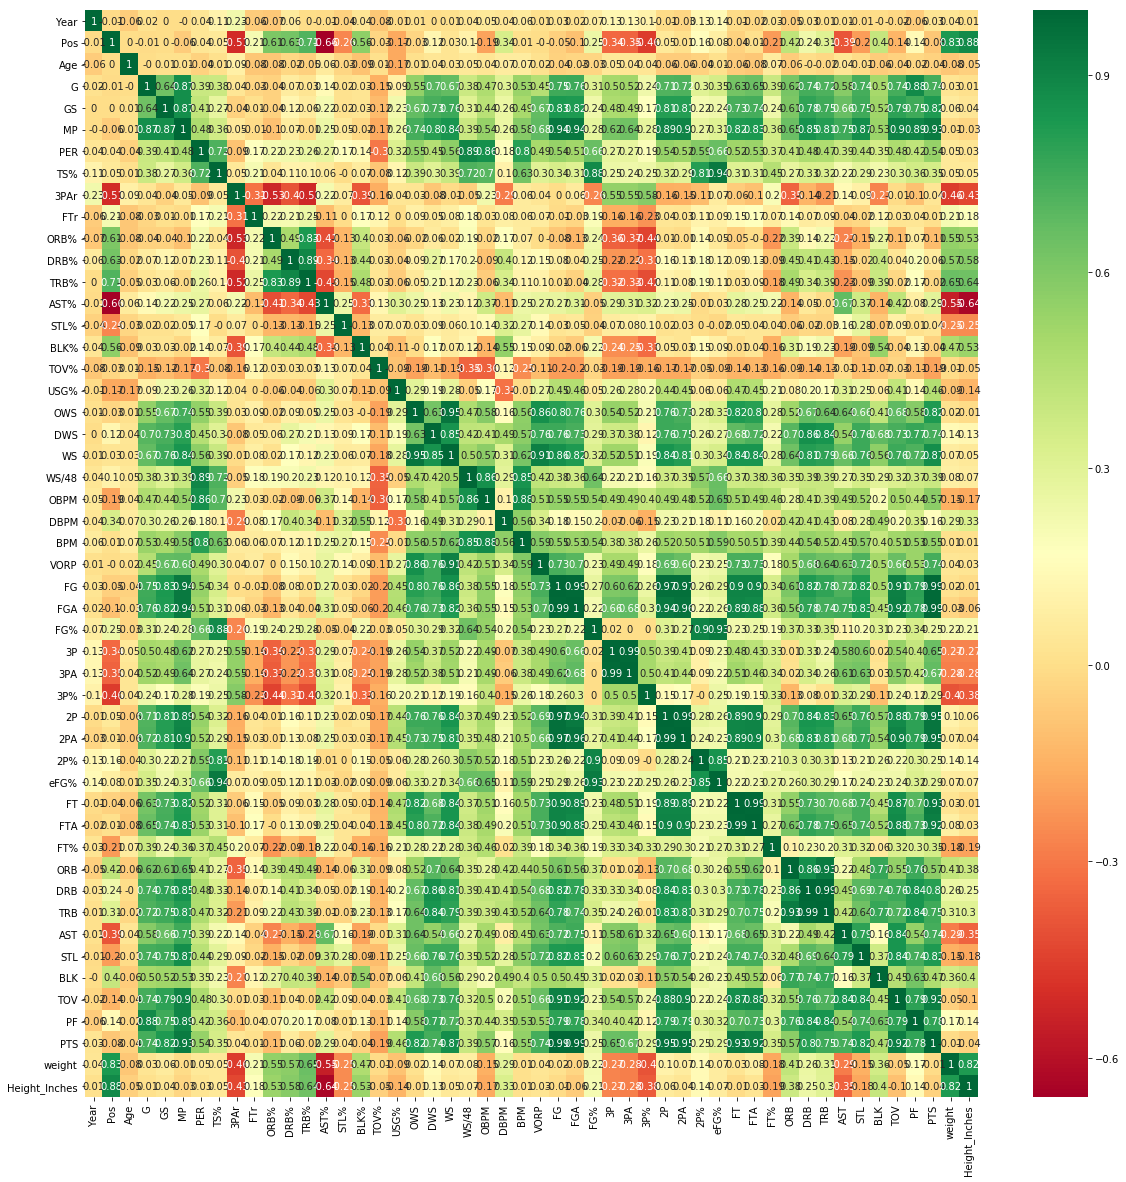

In [116]:
heatmap(NBA_1999_2017)#Multicollinearity Heatmap Matrix

None of the features changed from the past era (1980-1998). So we should see similar results for all models and in addition we will be dropping similar features as last time.

In [117]:
X=NBA_1999_2017.drop(['Pos','Year','Tm','Player','PTS','FTA','FT','FGA','FG','WS/48','2PA','2P','3PA','3P'], axis=1) #,'FTA','FT','FGA','FG','WS/48'
y=NBA_1999_2017['Pos']

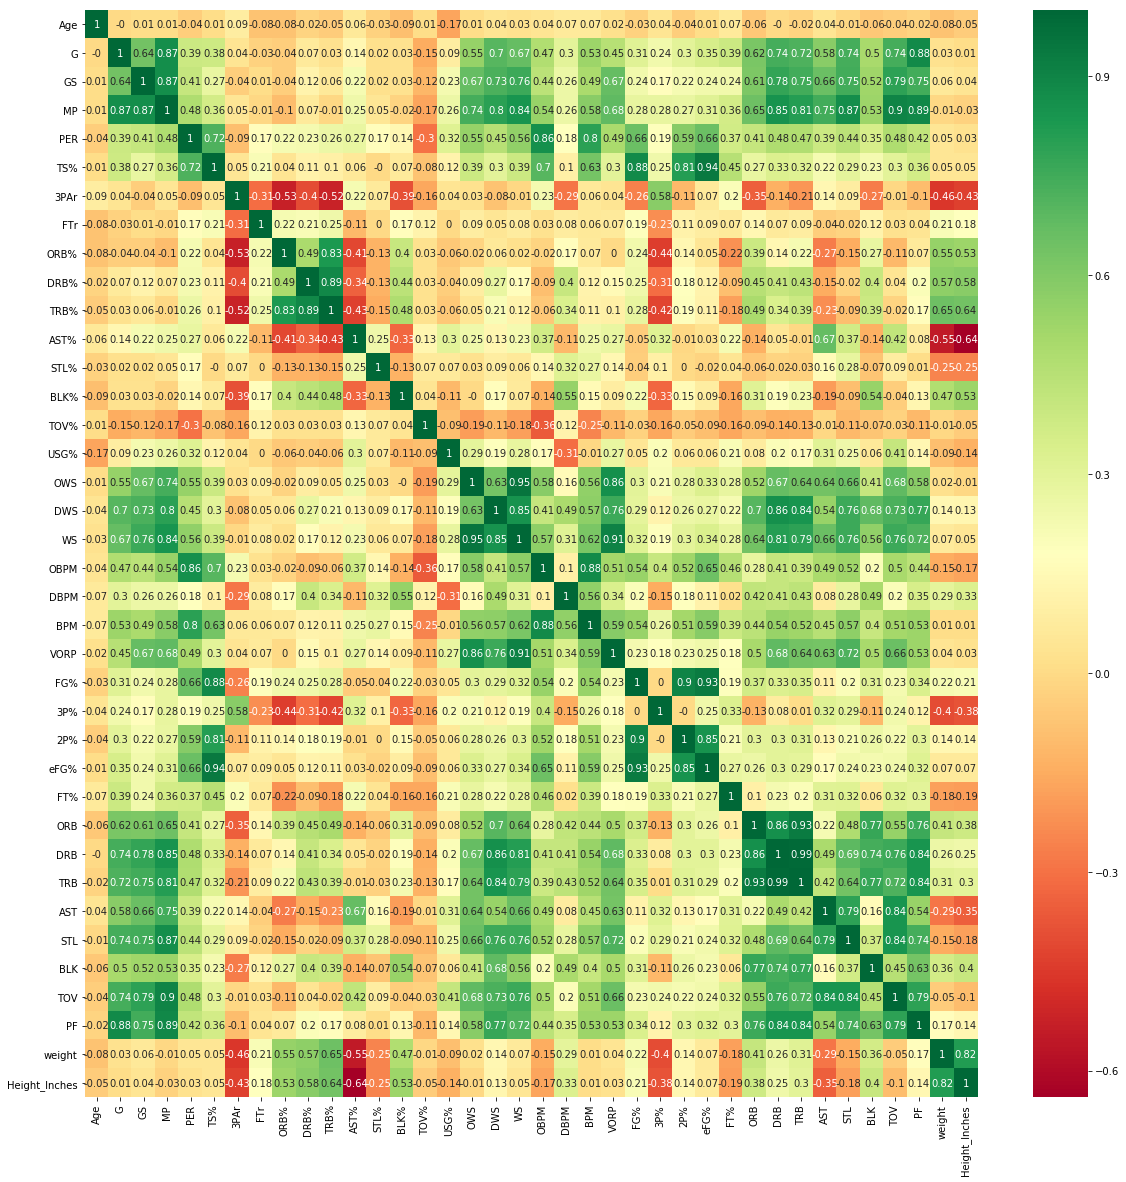

In [118]:
heatmap(X)#Multicollinearity Heatmap Matrix

In [119]:
X=scale_df(X)

#### KNN (1999-2017)

Accuracy is :68.83%
              precision    recall  f1-score   support

           1       0.86      0.91      0.88       436
           2       0.63      0.67      0.65       410
           3       0.58      0.59      0.58       423
           4       0.60      0.61      0.61       429
           5       0.78      0.66      0.71       442

   micro avg       0.69      0.69      0.69      2140
   macro avg       0.69      0.69      0.69      2140
weighted avg       0.69      0.69      0.69      2140



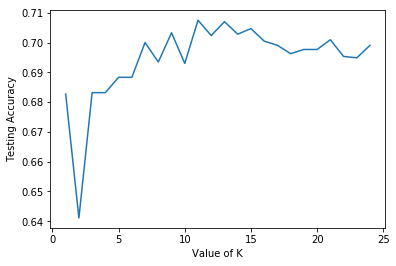

Accuracy is :70.75%
              precision    recall  f1-score   support

           1       0.86      0.92      0.89       436
           2       0.63      0.68      0.65       410
           3       0.63      0.60      0.61       423
           4       0.63      0.65      0.64       429
           5       0.78      0.69      0.73       442

   micro avg       0.71      0.71      0.71      2140
   macro avg       0.71      0.71      0.71      2140
weighted avg       0.71      0.71      0.71      2140



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,399,33,3,1,0
2,58,279,69,4,0
3,5,114,253,41,10
4,2,12,61,277,77
5,0,4,17,115,306


In [120]:
KNN(X,y)

As expected we get similar results to the prior era with the PG position having the best overall metrics. Let us move on to see how the rest of the models perform.

#### Adaboost (1999-2017)

In [121]:
ADABOOST(X,y)

Accuracy is :64.02%
              precision    recall  f1-score   support

           1       0.67      0.96      0.79       467
           2       0.61      0.38      0.47       404
           3       0.69      0.54      0.61       407
           4       0.59      0.29      0.38       419
           5       0.61      0.96      0.75       443

   micro avg       0.64      0.64      0.64      2140
   macro avg       0.63      0.63      0.60      2140
weighted avg       0.63      0.64      0.61      2140



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,450,15,1,1,0
2,192,155,54,3,0
3,22,80,220,66,19
4,3,5,42,120,249
5,0,1,2,15,425


Similar results with a much lower score than the three other models. Some hyper parameter tuning would definitely be needed for any further Adaboost analysis.

#### Random Forest (1999-2017)

Accuracy is :72.94%


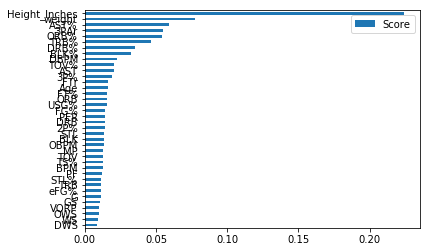

Accuracy is :77.2%


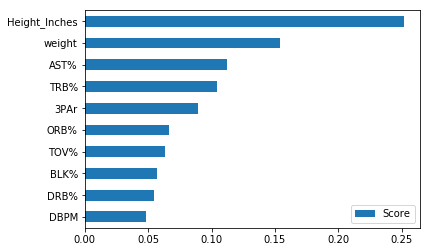

              precision    recall  f1-score   support

           1       0.86      0.92      0.89       458
           2       0.72      0.71      0.72       420
           3       0.73      0.69      0.71       396
           4       0.71      0.71      0.71       434
           5       0.82      0.81      0.81       432

   micro avg       0.77      0.77      0.77      2140
   macro avg       0.77      0.77      0.77      2140
weighted avg       0.77      0.77      0.77      2140



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,422,36,0,0,0
2,69,299,48,4,0
3,1,76,273,40,6
4,0,3,50,308,73
5,0,0,3,79,350


In [124]:
random_forest(NBA_1999_2017,X,y)

Essentially the same results as the prior era and not much to explore here. The PG and C positions seem to have the easiest time being classified. This makes logical sense as PG and C are at the end of the spectrums for basketball. Generally, a Center is very tall and has distinctly different stats than say a PG or SF. The same train of thought goes for a PG as they have way more assists from distributing the ball and tend to be on the shorter side/weighing less. 

In [125]:
PCA_n(X,y)

0.7728023491613857
0.8454268503233819
0.9279561846048302


In [126]:
PCA_random_forest(X,y,8)

Accuracy is :63.83%
              precision    recall  f1-score   support

           1       0.80      0.88      0.84       439
           2       0.57      0.54      0.56       425
           3       0.55      0.53      0.54       406
           4       0.57      0.56      0.56       445
           5       0.68      0.66      0.67       425

   micro avg       0.64      0.64      0.64      2140
   macro avg       0.63      0.64      0.63      2140
weighted avg       0.63      0.64      0.64      2140



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,388,48,3,0,0
2,85,231,94,11,4
3,13,114,217,51,11
4,1,11,66,249,118
5,1,1,13,129,281


The above model is confirming that PCA is not necessary for at least any of the basic bare bones modeling. 

#### SVM (1999-2017)

In [128]:
SVM(NBA_1999_2017, X, y)

Accuracy is :75.89%
              precision    recall  f1-score   support

           1       0.86      0.91      0.88       455
           2       0.73      0.67      0.70       443
           3       0.65      0.69      0.67       387
           4       0.71      0.68      0.70       446
           5       0.82      0.84      0.83       409

   micro avg       0.76      0.76      0.76      2140
   macro avg       0.76      0.76      0.76      2140
weighted avg       0.76      0.76      0.76      2140



In [129]:
PCA_n(X,y)

0.7728023926742439
0.8454268148571896
0.9279561260510966


In [130]:
PCA_SVM(X,y,9)

Accuracy is :66.12%
              precision    recall  f1-score   support

           1       0.84      0.85      0.85       439
           2       0.61      0.64      0.63       410
           3       0.58      0.57      0.57       417
           4       0.55      0.56      0.56       447
           5       0.72      0.68      0.70       427

   micro avg       0.66      0.66      0.66      2140
   macro avg       0.66      0.66      0.66      2140
weighted avg       0.66      0.66      0.66      2140



Predicted Result,1,2,3,4,5
Actual Result,,,,,
1,374,62,2,1,0
2,63,264,79,4,0
3,5,99,237,70,6
4,1,5,85,249,107
5,3,1,7,125,291


As expected, PCA did not improve results in the modern era. This time SVM out performed all other models with Random Forest coming in second!

### Positionless Basketball

With the current state of the NBA and to try to obtain better results, I decided to make some changes. In the position-less basketball era, I decided to take the data down to three positions. PG(1), SG/SF(2), PF/C(3).

In [131]:
NBA_1999_2017[(NBA_1999_2017['Pos']==3)]=2 #Taking the data into three classifications instead of 5. 
NBA_1999_2017[(NBA_1999_2017['Pos']==4)]=3
NBA_1999_2017[(NBA_1999_2017['Pos']==5)]=3

In [132]:
NBA_1999_2017.Pos.unique()

array([2, 3, 1])

In [133]:
X=NBA_1999_2017.drop(['Pos','Year','Tm','Player','PTS','FTA','FT','FGA','FG','WS/48','2PA','2P','3PA','3P'], axis=1) #,'FTA','FT','FGA','FG','WS/48'
y=NBA_1999_2017['Pos']

Accuracy is :95.14%


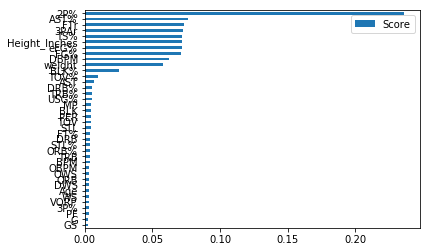

Accuracy is :94.67%


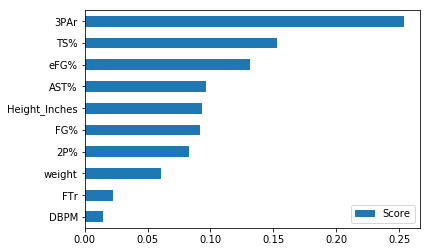

              precision    recall  f1-score   support

           1       0.86      0.89      0.87       436
           2       0.94      0.92      0.93       810
           3       1.00      1.00      1.00       894

   micro avg       0.95      0.95      0.95      2140
   macro avg       0.93      0.94      0.93      2140
weighted avg       0.95      0.95      0.95      2140



Predicted Result,1,2,3
Actual Result,,,
1,387,49,0
2,65,745,0
3,0,0,894


In [139]:
random_forest(NBA_1999_2017,X,y)

As expected this increased our accuracy by over 20 percent.  It is pretty amazing as we have a perfect classification of 3(C/PF) and a near perfect of 1 (PG). In addition we see our highest scores across the board when it comes to precision, recall, and f1-score.  Let's see how SVM performs. My guess, is very similar to Random Forest. 

In [ ]:
PCA_SVM(NBA_1999_2017,X,y)

## Conclusion

The classification model analysis of historical NBA data was extremely interesting. In the current day and age, we see a basketball floor spread with PF playing Center and vice versa. This definitely showed throughout the modeling. It is also interesting to look at how the C and PG positions were classified accurately the most compared to any other position. Further research into these two positions is definitely warranted. 

Throughout the analysis we see that both Random Forest and Support Vector Machine models worked the best. I believe both models could be tuned a bit more to get even more accurate results for the 5 position classification.  The results improved over the eras of basketball. I think this is due to the availability of new statistics. Essentially the more data you have for your model the more accurate your results will be. However, one caveat is the law of diminishing returns applies here. There will be a point where the accuracy decreases when you introduce too much data. Finding the sweet spot is pertinent for a optimal model. This is where PCA could come in, but as we saw for my models, PCA was never needed.  

### Additional Work

In [ ]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## KEEP IT FOR NOW
# Construct some pipelines
pipe_svm = Pipeline([('clf', svm.SVC(random_state=0))])
        
pipe_tree = Pipeline([
        ('clf', tree.DecisionTreeClassifier(random_state=0))])

pipe_rf = Pipeline([
        ('clf', RandomForestClassifier(random_state=0))])

# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

In [ ]:
pipe_svm = Pipeline([('pca', PCA(n_components=8)),
            ('clf', svm.SVC(random_state=0))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10]  , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

In [ ]:
# Construct pipeline
pipe_rf = Pipeline([('pca', PCA(n_components=8)),
            ('clf', RandomForestClassifier(random_state = 0))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [10, 15, 20],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [174]:
# Create the pipeline
pipe = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('svm', SVC(random_state=123))])

# Create the grid parameter
grid = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'svm__kernel': ['poly', 'sigmoid'], 'svm__C': [0.01, 1, 100], 'svm__degree': [2, 3, 4, 5], 'svm__gamma': [0.001, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [175]:
gridsearch.score(X_test,y_test)

0.5194805194805194

1. Preprocessed Data (Check)
2. Subset Data aka Choose 10 Features 
3. Train Test Split
4. Build the Model
    a. Tune the Model
    b. Pipeline
    c. Grid Search
5. Predict
6. Check Accuracy

Also want to basically feed in a single unmarked player and see what it tells me their position is maybe like a college player
